In [1]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

In [9]:
# fetch data
from sklearn.datasets import fetch_openml
df, target = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

C:\Users\lenovo\env\Lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [10]:
# check shape of data
df.shape

(70000, 784)

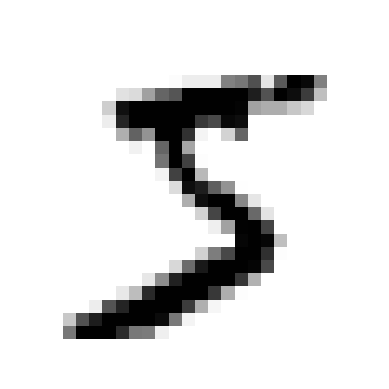

In [11]:
# Display the first image
digit = df[0]
digit_image = digit.reshape(28, 28)
plt.imshow(digit_image, cmap=plt.cm.gray_r, interpolation="nearest")
plt.axis('off')
plt.show()

In [12]:
# Standardise the data
scaler = StandardScaler()
df_scale = scaler.fit_transform(df)

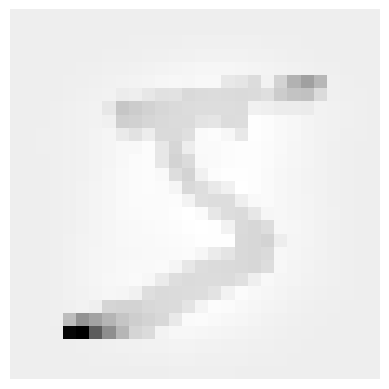

In [13]:
# Display the first image after standardisation
digit_scale = df_scale[0]
digit_scale_image = digit_scale.reshape(28, 28)
plt.imshow(digit_scale_image, cmap=plt.cm.gray_r, interpolation="nearest")
plt.axis('off')
plt.show()

In [14]:
# creating the training and validation set
X_train, X_valid, y_train, y_valid = train_test_split(df_scale, target, random_state = 10, test_size = 0.25)

In [15]:
# creating the random forest classification model
model = RandomForestClassifier(random_state=1, max_depth=3, n_estimators=100)

# Classification without PCA

In [16]:
# fit the classifier
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, random_state=1)

In [17]:
# predicting for the original validation set
pred_1 = model.predict(X_valid)

In [18]:
# checking the training performance - Accuracy Score
accuracy_score(model.predict(X_train), y_train)

0.7542095238095238

In [19]:
# checking the validation performance - Accuracy Score
accuracy_score(pred_1, y_valid)

0.7529142857142858

# Classification after PCA

In [20]:
#Fitting the PCA algorithm on our data to find the appropriate number of principal components to keep
pca = PCA().fit(X_train)

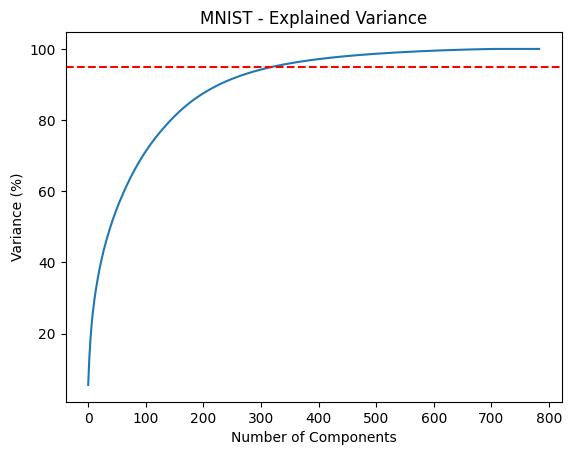

In [21]:
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_) * 100)
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('MNIST - Explained Variance')

# We want to preserve 95% of the variance so plot a horizontal line at 95% variance
plt.axhline(y=95, color='r', linestyle='--')
plt.show()

In [22]:
# transforming the original train and validation set to 350 components

# fit on the training data
pca = PCA(350).fit(X_train)

# transform both training and validation data
X_train_transformed = pca.transform(X_train)
X_valid_transformed = pca.transform(X_valid)

In [23]:
# checking shape of data after PCA
X_train_transformed.shape

(52500, 350)

In [24]:
# fitting the same random forest model on transformed data
model.fit(X_train_transformed,y_train)

RandomForestClassifier(max_depth=3, random_state=1)

In [25]:
# predicting for the transformed validation set
pred_2 = model.predict(X_valid_transformed)

In [26]:
# checking the training performance after transformation- Accuracy Score
accuracy_score(model.predict(X_train_transformed), y_train)

0.7940571428571429

In [27]:
# checking the validation performance after transformation- Accuracy Score
accuracy_score(pred_2, y_valid)

0.7850285714285714